# Sentiment Analysis using TextBlob (2023)
### John Cartlidge, University of Bristol

Here we look at some simple (and naive) approaches to perform sentiment analysis. 

This notebook requires the __TextBlob__ library: a non-adaptive noncommercial sentiment analyser that uses a classification model that was trained on a movie review corpus.

For information TextBlob see: https://textblob.readthedocs.io/en/dev/

Quick start guide: https://textblob.readthedocs.io/en/dev/quickstart.html

## Required install

This example requires `TextBlob` package for performing natural language processing and sentiment analysis. The code will not work without `TextBlob`. For installation details, see: 
> https://textblob.readthedocs.io/en/dev/install.html

<br>

For quick install using `pip`, issue the following commands on the command line:

> `pip install -U textblob`

> `python -m textblob.download_corpora`

Now we can import TextBlob functions. Also, let's import pandas and matplotlib plyplot as we will be using these later. 

In [1]:
from textblob import TextBlob
import pandas as pd  
import matplotlib.pyplot as plt 

# Document, sentence, and aspect-level sentiment analysis

__Problem__: We want to analyse the sentiment of reviews for the MacBook Pro 13 inch.

__Data__: We have access to online reviews. Here is an example:

> __MacBook Review:__ I feel the latest laptop from Mac is really good overall. It has amazing resolution. The computer is really very sleek and can slide into bags easily. However, I feel the weight is a let down. The price is a bit expensive given the configurations (I would expect an SSD storage), however the processor seems really good.

Create a TextBlob containing the review text...

In [2]:
review = TextBlob("I feel the latest laptop from Mac is really good overall. It has amazing resolution. The computer is really very sleek and can slide into bags easily. However, I feel the weight is a let down. The price is a bit expensive given the configurations (I would expect an SSD storage), however the processor seems really good.")

### __(1) Document-level sentiment analysis__: 

For document-level analysis, we can simply request the sentiment for the entire TExtBlob review...

In [3]:
review.sentiment

Sentiment(polarity=0.27530864197530863, subjectivity=0.5691358024691358)

Sentiment returns a tuple containing:

> polarity (+1 = extremely positive, 0 = neutral, -1 = extremely negative)

> subjectivity (0 = objective, 1 = extremely subjective)


We see this review is subjective (57%) and positive (0.28).

> The high __subjectivity__ score shows that the review contains lots of opinions, e.g., "I feel", "I would expect", "seems really good". In contast, a low subjectivity (i.e., a high __objectivity__) score would occur when the document is more factual (e.g., "Price is XXX, Size is XXX.)

> The __positive__ sentiment score indicates that the opinions expressed in the document are positive overall; with phrases such as "really good", "amazing", and "very sleek" outweighing the negative sentiment expressed in phrases such as "let down" and "bit expensive".

__Question:__ How accurate do you think this is? Do you agree?

So, we could stop here. We have an overall idea about the sentiment expressed in the review. But can we learn any more? 

### __(2) Sentence-level sentiment analysis__: 

Let's look in more detail at each sentence in the review to see what we can discover. 

Define the following method to create a dataframe, with each row containing one sentence in the review. We then add columns to show the polarity score and subjectivity of the sentence.

In [4]:
'''
Perform sentence-level sentiment analysis of text document

review: TextBlob document text

return: dataframe with columns {Sentence, Sentence Text, Polarity, Subjectivity}
'''
def get_sentence_sentiment_df(review):
    
    # Create a dataframe containing one row for each sentence in the review
    # and include the sentiment polarity and subjectivity of each sentence 
    df = pd.DataFrame([s, str(s), s.polarity, s.subjectivity] for s in review.sentences)
    
    # Name the four columns in the dataframe 
    df.columns = ['Sentence','Text','Polarity','Subjectivity']
        
    return df

Now, we can use the method above to create a dataframe of sentence-level sentiment analysis. Let's print the dataframe to the screen, ordered by polarity (so that sentences with the most positive sentiment appear at the top)...

In [5]:
# Create dataframe of sentence-level sentiment
sentence_df = get_sentence_sentiment_df(review).sort_values(by='Polarity',ascending=False)

# Order dataframe by polarity score
sentence_df.sort_values(by='Polarity',ascending=False)

,Sentence,Text,Polarity,Subjectivity
1,"(I, t, , h, a, s, , a, m, a, z, i, n, g, , ...",It has amazing resolution.,0.600000,0.900000
0,"(I, , f, e, e, l, , t, h, e, , l, a, t, e, ...",I feel the latest laptop from Mac is really go...,0.400000,0.500000
2,"(T, h, e, , c, o, m, p, u, t, e, r, , i, s, ...",The computer is really very sleek and can slid...,0.316667,0.566667
4,"(T, h, e, , p, r, i, c, e, , i, s, , a, , ...",The price is a bit expensive given the configu...,0.100000,0.650000
3,"(H, o, w, e, v, e, r, ,, , I, , f, e, e, l, ...","However, I feel the weight is a let down.",-0.155556,0.288889


We see that there are five sentences. The sentence with the highest polarity (row id=1) is "It has amazing resolution". So, we can see that the review has positive sentiment towards the resolution of the macbook.

The sentence with the lowest polarity is "However, I feel the weight is a let down". Therefore, the review contains negative sentiment towards the weight of the macbook.

By drilling down to the sentence level, we have been able to discover more detail about exactly what the author of the review likes and does not like about the macbook. But can we do more? What about sentence id 4? Let's have a look at this sentence in full...

In [6]:
# print the text of sentence 4
sentence_df.loc[4]['Text']

'The price is a bit expensive given the configurations (I would expect an SSD storage), however the processor seems really good.'

Sentence four has polarity 0.1 (slightly positive). However, it is clear that there are multiple aspects of the mac being discussed (i.e., price, storiage, processor). Can we analyse the text more deeply to understand the sentiment for each of these indvidual aspects?   

### __(3) Aspect-level sentiment analysis__

Here, we will try to split sentences to determine the sentiment of each aspect mentioned in a sentence. The approach we will take is very simple and is __not__ the best way to do this; it is purely an example.

We will take the following approach:
> (a) Generate a list of "aspect" words that describe the product<br>
> (b) For each sentence, find aspects in the sentence<br>
> (c) If there are multiple aspects, split the sentence at the mid-point between aspects<br>
> (d) Get the sentiment of the part of sentence associated with each aspect word<br>
> (e) Take the mean sentiment value of each aspect word found in the full review text<br>

This approach does not account for grammar or sentiment shifters ("but", "not", etc.) or any other parts of speech that could help us; but as a rough-and-ready first approach, let's see how it performs...

#### 3(a) Create list of aspects

We could generate our own list of aspects. However, to make our life simple, we will simply use the headings from the MakBook technical specification (https://www.apple.com/uk/macbook-pro-13/specs/). This gives us the following list:

> __MacBook Aspects:__ Price, Display, Processor, Storage, Memory, Graphics, Charging, Expansion, Keyboard, Trackpad, Wireless, Camera, Video, Audio, Battery, Power, Size, Weight 

In [7]:
# Create a list of aspects
mac_aspects = ['price', 'display', 'resolution', 'processor', 'storage', 'memory', 'graphics', 'charging', 
           'expansion', 'keyboard', 'trackpad', 'wireless', 'camera', 'video', 
           'audio', 'battery', 'power', 'size', 'weight']

#### 3(b) Find aspects mentioned in each sentence

Next, we need to search each sentence to see if any aspects are mentioned. The following function will take the sentence-level dataframe and append a column containing aspects that are mentioned in each sentence...

In [8]:
'''
 Append a column of aspects contained in each sentence
 Return dataframe with aspects

sentence_df : sentence level dataframe, where each row is a sentence
aspects : list of aspects to find in each sentence
 '''
def append_aspects_column(df,aspects):

      # Iterate through each sentence and each aspect; 
      # add aspects that appear in sentence to aspects list
    if aspects!=None:
        aspects_list = [] 
        for s in df['Sentence']:
            aspect = []
            if any(a in aspects for a in s.words):
                #print("An aspect exists in sentence: ", s)       
                # we want this to be in order of appearance of aspect in sentence, not alphabetically
                for w in s.words:
                    if w in aspects:
                        aspect.append(w) # list of aspects that appear in sentence s

            aspects_list.append(aspect) # column of aspect lists (one for each sentence)
            
        # Add the list of aspects mentioned in sentence as a new column in the dataframe    
        df['Aspects'] = aspects_list
    
    return df


In [9]:
# Find aspects in each sentence
sentence_df =  append_aspects_column(sentence_df,mac_aspects)
sentence_df

,Sentence,Text,Polarity,Subjectivity,Aspects
1,"(I, t, , h, a, s, , a, m, a, z, i, n, g, , ...",It has amazing resolution.,0.600000,0.900000,[resolution]
0,"(I, , f, e, e, l, , t, h, e, , l, a, t, e, ...",I feel the latest laptop from Mac is really go...,0.400000,0.500000,[]
2,"(T, h, e, , c, o, m, p, u, t, e, r, , i, s, ...",The computer is really very sleek and can slid...,0.316667,0.566667,[]
4,"(T, h, e, , p, r, i, c, e, , i, s, , a, , ...",The price is a bit expensive given the configu...,0.100000,0.650000,"[price, storage, processor]"
3,"(H, o, w, e, v, e, r, ,, , I, , f, e, e, l, ...","However, I feel the weight is a let down.",-0.155556,0.288889,[weight]


#### 3(c) Split sentences with multiple aspects

Some sentences contain multiple aspects. For instance, we see sentence 4 mentions "price", "storage", and "processor". To deal with this, let's simply find the location of each aspect and then split the sentence up at the mid-points between aspects. This will require a couple of steps...



(i) Split the sentence into n-grams of size n. Convert to TextBlob strings to calculate the sentiment of each n-gram. Let's set: __n=3__ as a default.


In [10]:
'''
Convert a sentence to n-grams of size n. Return polarity for each n-gram as list

return: ngram_polarities list
'''
def get_ngram_polarities(sentence,n=3):
    
    ngram_polarities = []
    for i in sentence.ngrams(n):
        ngram_string = ""
        for word in i:
            ngram_string += word + " "
        ngram_polarities.append(TextBlob(ngram_string).polarity) # get polarity of n-gram string
    
    return ngram_polarities

(ii) Find the index location of each aspect in the sentence, then find the ranges for each aspect (i.e., split the sentence at the mid-way point between each aspect location) 

In [11]:
'''
Split a sentence using a aspects contained in a list. 

Find the location of aspects in the sentence, then split at the mid-point between aspect locations.

return: 
range_end list containing start and end location of each split
aspect_index list containing location of each aspect 
'''
def get_range_ends(sentence,aspects,n=3,verbose=False):

    index = 0
    aspect_index = []
    count = 0
    last_index = 0

    # hold the index of the mid-point between the index of each aspect location 
    range_end = [] 

    for i in range(len(sentence.words)):
        for a in aspects:
            if(a==sentence.words[i]):
                if verbose: print("Aspect '", a, "' found at index: ", i)
                aspect_index.append([a,i])
                if count > 0:
                    range_end.append(last_index + (i - last_index)/2)
                    #print("Range end: ", range_end)
                last_index = i
                count += 1

    #print(aspect_index)

    # range end holds mid-point of indices between aspects. Round to integer value and add start and end.
    for i in range(len(range_end)):
        range_end[i] = round(range_end[i])
    range_end.insert(0,0)
    range_end.append(len(sentence.ngrams(n)))
    # print(range_end)
    return range_end, aspect_index

We can now use the above to find the locations to split the sentence, using aspects found in the sentence, as follows:

In [12]:
sentence = review.sentences[4]
#get list of start and end locations to split sentence, where aspects are in the middle of each range.
print(sentence)
print("Split sentence at locations:", get_range_ends(sentence,mac_aspects,3,False))

The price is a bit expensive given the configurations (I would expect an SSD storage), however the processor seems really good.
Split sentence at locations: ([0, 8, 16, 19], [['price', 1], ['storage', 14], ['processor', 17]])


#### 3(d) Get the sentiment associated with each aspect word

Let's do a simple hack: for all n-grams associated with an aspect, sum the maximum and minimum polarity...

In [13]:
'''
Calculate polarity for an aspect from range of polarities (sum the min and max values).

    polarities: array of polarity scores
    ranges: break points of ranges
    
    return: polarities array
'''
def get_aspect_polarity(polarities, range_end):
    
    pol = []
    for a in range(len(range_end)-1):
        pol.append(min(polarities[range_end[a]:range_end[a+1]]) + max(polarities[range_end[a]:range_end[a+1]]))
    return pol 

And let's create a helper function to plot the sentiment of the sentence...

In [14]:
''' Plot graph of sentence sentiment,with aspect words tagged

    requires matplotlib.pyplot as plt

    sentence = TextBlob Sentence
    aspects = list of aspects
    n = ngram length (default 3) '''
def plot_sentence_sentiment_with_aspects(sentence,aspects,n=3):

    # split sentence into n-grams of size n=3 and then calculate sentiment of each n-gram
    n_gram_polarities = get_ngram_polarities(sentence,n)
    # find aspect locations in the sentence and split sentence between aspects
    range_ends, aspect_indexes = get_range_ends(sentence,aspects,3,False) 
    # get polarities for aspects
    ap = get_aspect_polarity(n_gram_polarities,range_ends)

    plt.plot(n_gram_polarities)
    plt.title('Sentence sentiment with aspects labelled')
    plt.xlabel(str(n)+"-gram")
    plt.ylabel('polarity')
    x = range(len(sentence.words))
    plt.xticks(x,sentence.words,rotation=90)
    
    # write aspect labels and polarity at correct location
    for i in range(len(aspect_indexes)):
        plt.text(aspect_indexes[i][1],0.05,aspect_indexes[i][0]+" = "+str(ap[i]),rotation="vertical",color="red")
    # draw vertica lines to signify region around each aspect word
    for r in range_ends:
        plt.axvline(x = r, color = 'r', label = 'axvline - full height')
    plt.show()

Let's see how it works...

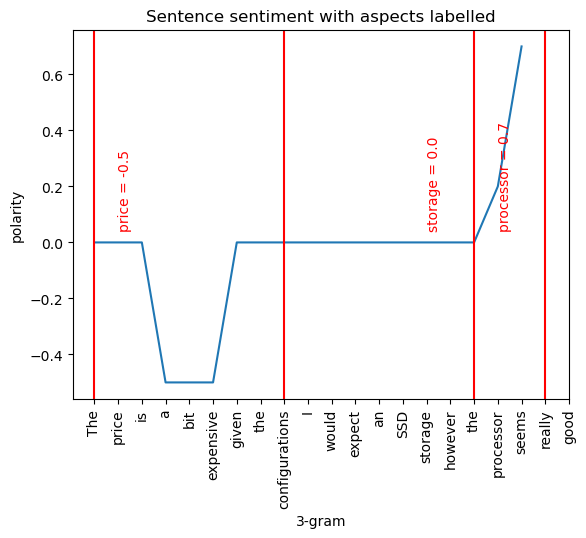

In [15]:
sentence = review.sentences[4]
plot_sentence_sentiment_with_aspects(sentence,mac_aspects,3)

So, we will split the sentence into 3; each associated with an aspect:
> Price: sentiment = -0.5. "The __price__ is a bit expensive given the"

> Storage: sentiment = 0.0. "configurations (I would expect an SSD __storage__), however"

> Processor: sentiment = +0.7. "the __processor__ seems really good"

What do you think? It's not perfect, but it's not a bad start.

#### 3(e) Get mean sentiment for each aspect

Now let's make a function to perform aspect-level sentiment for our full review. Save output as a dataframe.  

The following method will take a dataframe of reviews, where each row is a sentence, and iterate over each row. If there are multiple aspects in the sentence, split the sentence to get aspect-level sentiment; drop rows with no aspects; and then return a dataframe of aspect-level sentiment. 

In [16]:
'''
Get aspect level sentiment. 

Input: 
- review (Textblob) 
- aspects list

Return: dataframe of aspect-level sentiment
'''
def get_aspect_sentiment_df(review,aspects):

    # First create a dataframe of sentence sentiment
    df = get_sentence_sentiment_df(review)
    
    # Have aspects been appended to sentences?
    if not 'Activity' in df.columns:
       append_aspects_column(df,aspects)    

    # Create a new dataframe
    df_aspect = pd.DataFrame()

    # iterating over rows in sentence-level sentiment dataframe using iterrows() function  
    for i, j in df.iterrows(): 

        if len(j['Aspects'])==1: # one aspect found in sentence, copy row
            rowdict = {'Aspect':j['Aspects'][0],'Polarity':j['Polarity'],'Text':j['Text']}
            df_row = pd.DataFrame(rowdict,index=[1])
            df_aspect=pd.concat([df_aspect,df_row],ignore_index=False)

        if len(j['Aspects'])>1: # multiple aspects found in sentence, split row

            # get array of aspect polarities for sentence, using n-gram.
            range_ends, aspects_index = get_range_ends(j['Sentence'],aspects,3)
            pols = get_aspect_polarity(get_ngram_polarities(j['Sentence'],3),range_ends)
            for p in range(len(pols)):
                rowdict = {'Aspect':j['Aspects'][p],'Polarity':pols[p],'Text':j['Text']}
                df_row = pd.DataFrame(rowdict,index=[1])
                df_aspect=pd.concat([df_aspect,df_row],ignore_index=False)
        
    return df_aspect

We can now use the above method to get aspect-level sentiment for the full review, ordered by polarity score...

In [17]:
# Get aspect-level sentiment and order with highest polarity shown at the top
aspect_df = get_aspect_sentiment_df(review,mac_aspects).sort_values(by='Polarity',ascending=False)
aspect_df

,Aspect,Polarity,Text
1,processor,0.700000,The price is a bit expensive given the configu...
1,resolution,0.600000,It has amazing resolution.
1,storage,0.000000,The price is a bit expensive given the configu...
1,weight,-0.155556,"However, I feel the weight is a let down."
1,price,-0.500000,The price is a bit expensive given the configu...


So, we now have a sentiment score for each aspect of the review. Our aspect-level sentiment analysis is complete. 

Let's remind ourselves of the original review text:

> __MacBook Review__: I feel the latest laptop from Mac is really good overall. It has amazing resolution. The computer is really very sleek and can slide into bags easily. However, I feel the weight is a let down. The price is a bit expensive given the configurations (I would expect an SSD storage), however the processor seems really good.


We can see that aspect-level sentiment analysis shows that the review is:

> Very positive for __processor__ and __resolution__

> Neutral on __storage__

> Somewhat negative for __weight__

> Negative for __price__


__Question:__ How accurate does that seem to you? Is this approach useful?

## Try it yourself.

We can now perform document, sentence, and aspect level sentiment analysis with just a few python commands.

`review` : TextBlob of review text

`aspects` : list of aspect strings

`get_sentence_sentiment_df(review)` : dataframe of sentence-level sentiment

`get_aspect_sentiment_df(review,aspects)` : dataframe of aspect-level sentiment

`plot_sentence_sentiment_with_aspects(sentence,aspects)` : plot sentiment of a sentence

Let's try using these functions on some other reviews...


### Long Review

Let's try a real review for the MacBook. It is much longer than the example reviews we looked at before. 

> https://www.t3.com/reviews/new-macbook-review

Enter code below to perform sentiment analysis of the review. What do you think of the result? Is it accurate?

In [18]:
long_review = "MacBook review: The most portable MacBook ever is far from the most practical. The new MacBook crams more interesting tech than you can shake a USB (Type-C) stick at into its skinny 12-inch frame. It's a dazzling device for sure, one that would set tongues wagging down at the pub in a heartbeat — but whether it would slot into your life without causing a fuss is an entirely different matter. OS X 10.11 El Capitan features: what's new and what matters The thing is, the new MacBook isn't a MacBook Air with a Retina display, which is what many people on the street were expecting from Apple. While it borrows the MacBook Air's tapered design, along with the MacBook Pro with Retina's high-resolution display and skinny black bezel, its shallow keyboard, Intel Core M processor and single USB Type-C port position it as an entirely new category of laptop. I'm not convinced that power-hungry MacBook owners will rush out to trade their machines for one, but if you're looking for a laptop that's as portable as an iPad and runs OS X, the new MacBook is a luxurious, albeit flawed option. A fashion item with a designer price tag to match, it starts at £1,049 for the entry-level model with 256GB of storage, rising to £1,299 for the more powerful 512GB configuration. New MacBook: Size and build Like Dell's Windows-powered XPS 13, the new MacBook slims down the display's bezel to accommodate more screen. Despite being 12 inches, its footprint is almost identical to the 11-inch MacBook Air, and at 2.03 pounds (versus the Air's 2.38 pounds) barely registers when slung into a backpack for transportation. Measuring just 30 x 19.2 x 1.7cm (W x D x H), the new MacBook is a whisker longer and wider than the 11-inch Air (28 x 19.7 x 1.31cm) while shaving off around half a millimetre in height. It's crafted out of a durable aluminium that stands up well to knocks and scrapes. New MacBook: Features One of Apple's more contentious decisions was to give the new MacBook just one USB Type-C port. Smaller than a standard USB port and reversible, USB Type-C has been hailed as the future because it provides power, a connection to an external display (through DisplayPort, HDMI or VGA) and a USB port. The bad news is that to simultaneously use two or more of the above you'll need to pick up a USB-C Multi Port adapter, which Apple sells for £65. Apple had to make a trade-off between portability and convenience, and if you're set on using wired peripherals or charging your smartphone on the move, sorry: coughing up for and carrying around an adapter is a necessary evil. Along with a switch to USB Type-C, Apple had to engineer an entirely new keyboard and trackpad to make the new MacBook catwalk-thin. The innovative Force Touch Trackpad, which enables a third 'Force' click by pressing down on the trackpad with a certain degree of pressure, can be used for anything from activating a Quick Look preview to annotating attachments or seeing a file's information. Where traditional keyboards use a scissor mechanism, which tends to wobble around the edges, the new MacBook's keyboard uses Apple's new butterfly hinge under each individually-backlit key. Made from a single, strong piece of material, it makes every keypress responsive wherever you hit it. While precise, it provides minimal travel and feels closer to typing on an on-screen keyboard than a traditional tactile one. If you're looking to buy the new MacBook to hammer out long documents on the regular, see if you can try its keyboard out first - or you may find yourself taking advantage of Apple's 14-day returns policy. The new MacBook's speakers provide surprisingly loud and clear sound at high volumes with punchy mid-range tones and, for their size, impressive low-end. New MacBook: Display The centrepiece of the new MacBook, its 2,304 x 1,440 pixel-resolution display is a sight to behold. At 226 pixels-per-inch (PPI), it goes toe-to-toe with the 13-inch MacBook Pro with Retina (227 PPI) - I'd go as far to say that the new MacBook's thinner black bezel makes it the more attractive of the two. It's an IPS variant, which means bold colours, deep blacks and excellent viewing angles; crank up the brightness and you can even read websites comfortably outdoors - although you'll have to put up with screen glare and reflections. By default, OS X sets the resolution to 1,280 x 800, which renders crisp text, smooth lines and sharp images but leaves little room on the desktop for apps and windows. Upping it to 1,440 x 900 strikes a better balance between usable space and image quality. New MacBook: Performance The new MacBook houses Intel's Core M processor, which brings a few advantages and disadvantages. On the plus side, it uses so little power that Apple didn't need to put a fan inside, lending to its thin-ness. No fan means no noise, and very little heat dissipation - even when you're pushing the machine to its limits. So, here's the not so good part. Core M, a chip designed for mobile devices and 2-in-1 hybrids, is a good deal slower than the Core-series processors found in today's MacBook Air and MacBook Pro with Retina models, and as such isn't well-suited to heavy computing tasks such as editing large image files, videos and 3D rendering. On the other hand, the new MacBook's 8GB of RAM and fast 128GB or 256GB SSD mean it's easily nippy enough for everyday tasks - such as surfing the web, editing small-medium image files, streaming video, writing documents and even some (very) light gaming thanks to its integrated HD 5300 graphics. New MacBook: Battery Rather than a traditional rectangular battery, Apple came up with a terraced, contoured battery design to better fit the new MacBook's slim dimensions. Rated at 39.7Whr, it fell just short of Apple's 9-hour batter life claim during T3's rigorous battery life test, clocking in at just over 7 hours when looping a 1080p video over Wi-Fi. That's still impressive when you consider that it's driving all of those pixels, but if you value battery life above all else then the 13-inch MacBook Air, which has the legs to go for up to 12 hours, is still the king. New MacBook: Verdict A genuinely unique laptop for those seeking a Retina display in the most compact and light chassis around, the fact remains that the new MacBook's many compromises mean it won't suit everyone. It has the ability to stun and confuse in equal measure, packing enough power to be used as your main machine, depending on what you do. But even then you'll have to put up with switching adapters when hooking up monitors and wired peripherals and re-train your fingers to adapt to the keyboard's lack of tactile feedback. If money is no object, and you're prepared to see past its deficiencies, Apple's gorgeous new MacBook glistens like gold (literally, if you opt for it in Gold, rather than Silver or Space Grey). For everyone else, it may be worth at least holding out for a successor with one more USB port to appear down the line. New MacBook: is this the way all laptops should be? Including just one USB Type-C port and tampering with the MacBook Air's near-perfect keyboard were daring, if unsurprising moves considering Apple's penchant for minimalism. Holding the new MacBook in the hand is like seeing into the future of laptop design; it's the MacBook Air all over again. Tablets are expected to sell poorly for a second consecutive year in 2015 as people look toward thin and light computers that let them get real work done, an area where the new MacBook excels. But - and it's a biggy - it feels like the new MacBook is ahead of its time and will prove one too many compromises for most people. Using an adapter is awkward compared to full-size USB ports, adds cost and detracts from the machine's slick design. It's likely that future laptop makers - including Apple - will at least do what Google did with the Chromebook Pixel 2 and include two USB Type-C ports to lessen the pain."
review = TextBlob(long_review)
asp_df = get_aspect_sentiment_df(review, mac_aspects)

print("\n=== Review text contains ", len(review.ngrams(n=1)), " words ===")
print("Document polarity: %.2f" % review.polarity)

# Take the mean polarity for each aspect, and then sort on mean polarity...
summary_df = asp_df.groupby('Aspect',as_index=False)['Polarity'].mean()
summary_df.columns = ['Aspect','Mean Polarity']
summary_df.sort_values(by='Mean Polarity',ascending=False)


=== Review text contains  1417  words ===
Document polarity: 0.13


,Aspect,Mean Polarity
10,storage,0.500000
9,size,0.316061
0,battery,0.284091
3,graphics,0.200000
11,trackpad,0.157388
2,display,0.104909
12,video,0.103750
8,resolution,0.084375
7,processor,0.044589
4,keyboard,0.007900


Is this accurate? Well, the full review contains a handy summary of the pros and cons: 

> REASONS TO BUY
>+ Superb __battery__ life   
>+ So __portable__           
>+ The future of laptop design

> REASONS TO AVOID
>+ We want more __power__    
>+ More USB-C extras needed
>+ Can't be your main machine

We say: 
> __positive__: battery (0.28), size (0.32)

> __negative__: power (-0.04) 

Hmm. Okay. So, it's not perfect, but it certainly has __some__ accuracy. And since we can automate this process, we can run it across hundreds, thousands, or millions of reviews. 

Using the structure of sentences (parts of speech) to better detect aspect-level sentiment will certainly help. Time to get coding!

## Algo trading on sentiment

Let's consider a couple of tweets that have moved the stock markets....

### 1. The Hack Crash

"__Hack Crash__", Associated Press Tweet, 23 April 2013. See [Journal Link For Reference](https://doi.org/10.1177/0263276415583139)

> Breaking: Two Explosions in the White House and Barack Obama is injured



In [19]:
hack_crash_text="Breaking: Two Explosions in the White House and Barack Obama is injured"
hack_crash_tweet = TextBlob(hack_crash_text)
print("Hack Crash: polarity %.2f" % hack_crash_tweet.polarity)
print("Hack Crash: subjectivity %.2f" % hack_crash_tweet.subjectivity)

Hack Crash: polarity 0.00
Hack Crash: subjectivity 0.00


Notice that the Hack Crash Tweet has neutral sentiment. Does this seem correct?


Breaking: Two Explosions in the White House and Barack Obama is injured


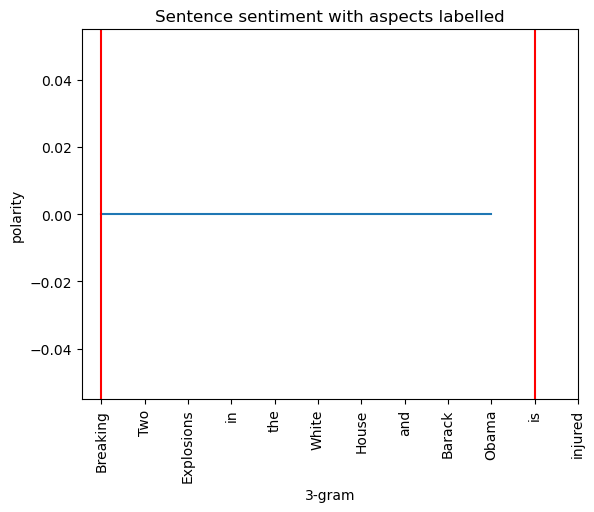

In [20]:
# Perhaps there is positive sentiment in parts that are negated by negative sentiment elsewhere?
# We can check this by plotting sentiment across each sentence...
for s in hack_crash_tweet.sentences:
    print(s)
    plot_sentence_sentiment_with_aspects(s,[])

Graphs show that there is neutral sentiment throughout. So, what else could be happening here?

Notice also that the Hack Crash Tweet has subjectivity = 0.0; i.e., it is an __objective statement of fact__. Statements of fact (irrespective of their truth) do not contain sentiment.

__Question__: is this a problem for us? Well, it means we have to do more than simply consider sentiment. We need to better understand the content and context.

### 2. Muddy Waters


__Muddy Waters__, 6 Aug. 2019 Tweet. See [High Court Trial Papers For Reference](https://www.burfordcapital.com/media/1712/20200401-burford-v-lse-claimants-skeleton-argument-for-trial.pdf)

> Muddy Waters is now in a blackout period until tomorrow 8 am London time when we will announce a new short position on an accounting fiasco that’s potentially insolvent and possibly facing a liquidity crunch. Investors are bulled up about this company. We’re not 

In [21]:
muddy_waters_tweet="Muddy Waters is now in a blackout period until tomorrow 8 am London time when we will announce a new short position on an accounting fiasco that’s potentially insolvent and possibly facing a liquidity crunch. Investors are bulled up about this company. We’re not"
muddy_tweet=TextBlob(muddy_waters_tweet)
print("Muddy Waters: polarity %.2f" % muddy_tweet.polarity)
print("Muddy Waters: subjectivity %.2f" % muddy_tweet.subjectivity)

Muddy Waters: polarity 0.03
Muddy Waters: subjectivity 0.69


So, we get __neutral sentiment__ for the Muddy Waters tweet. __Question__: Does this seem correct to you?

Muddy Waters is now in a blackout period until tomorrow 8 am London time when we will announce a new short position on an accounting fiasco that’s potentially insolvent and possibly facing a liquidity crunch.


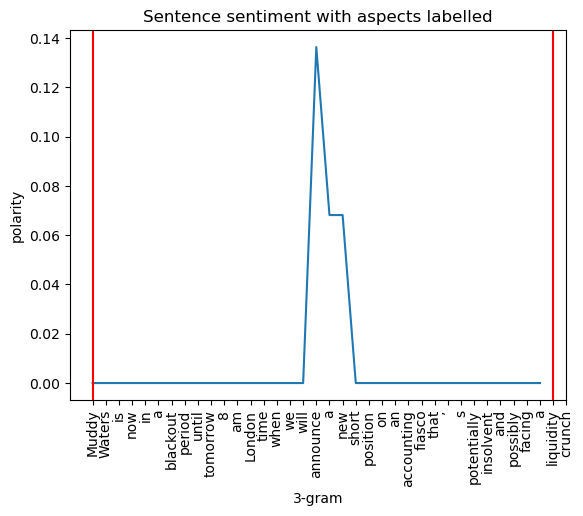

Investors are bulled up about this company.


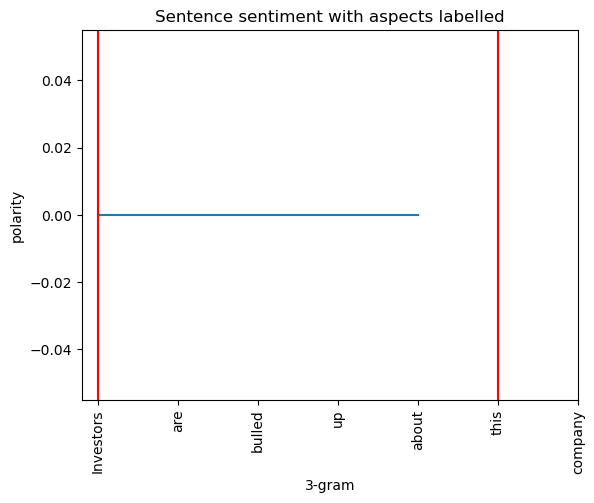

We’re not


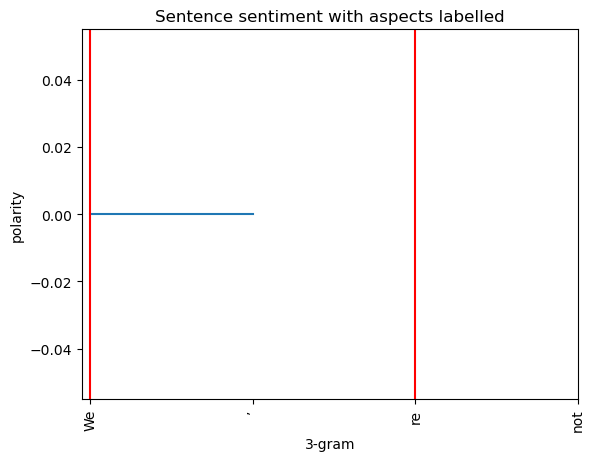

In [22]:
# Perhaps there is positive sentiment in parts that are negated by negative sentiment elsewhere?
# We can check this by plotting sentiment across each sentence...
for s in muddy_tweet.sentences:
    print(s)
    plot_sentence_sentiment_with_aspects(s,[])

Graphs show that there is neutral sentiment throughout. So, what else could be happening here?

Remember, we mentioned at the top of this notebook that TextBlob is trained on movie reviews? So, I'm guessing "insolvent", "liquidity crunch", and "bulled" are missing from the training corpus.

This suggests that we have much more work to do to handle financial datasets, if we want our trading algos to be able to react to news and social media. 

Nobody said it was going to be easy! ;-)